## Project No1 - The Mind

Refer to the `README.md` for further information about how to play the game and the objectives for this first project. 

When writing code, we recommend you to be as modular as possible. For example, if you are running multiple experiments for different choices of parameters, it may be convenient to write a function that does one experiment and then make multiple calls to the same function. Follow the _do not repeat yourself_ rule when writing code! 

In [1]:
import numpy as np
from scipy.stats import binom
from scipy.stats import beta
from scipy.stats import expon
import matplotlib.pyplot as plt

np.random.seed(42)

Let's start by creating a function that generates one sample of the game. Feel free to change this code as you find it suitable, for example by changing how the sampling is created or if you want to sample cards with replacement (this could be useful for the last questions).

In [2]:
def sample_cards(N, n, k):
    """
    Generates a simulated sample of how the cards are shuffled among players. 
    
    Arguments: 
        - N : Total number of cards
        - n : Number of players
        - k : Number of cards per player
        
    Returns: 
        - 2D numpy array where each row represent each player and each column their card in ascending order. 
    """
    
    assert n * k <= N, "There are not enough cards for all the players!"
    
    _cards = np.random.choice(a=np.arange(1, N+1), size=n*k, replace=False)
    _cards = _cards.reshape(n,k)
    _cards.sort(axis=1)
    return _cards

Now we can just generate how cards are distributed among players by simply making a call to this function with the desired parameters. 

In [3]:
cards = sample_cards(100, 6, 3)
cards

array([[54, 71, 84],
       [40, 45, 46],
       [11, 23, 81],
       [ 1, 19, 31],
       [34, 74, 91],
       [ 5, 77, 78]])

and access the cards of each player with 

In [4]:
player0 = cards[0,:]
player1 = cards[1,:]
player0, player1

(array([54, 71, 84]), array([40, 45, 46]))

The lowest card in the game is

In [5]:
np.min(cards)

1

In [6]:
np.arange(1, 5)

array([1, 2, 3, 4])

In [7]:
cards
np.sort(cards)
cards

array([[54, 71, 84],
       [40, 45, 46],
       [11, 23, 81],
       [ 1, 19, 31],
       [34, 74, 91],
       [ 5, 77, 78]])

### 1. What is the distribution of the lowest number? 

Repeat the sampling of the cards multiple times for the same choice of `N`, `n` and `k` and plot the distribution of the lowest number in the sample. Use an [histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) to plot the distribution and set the bins to be the available integer number cards. 

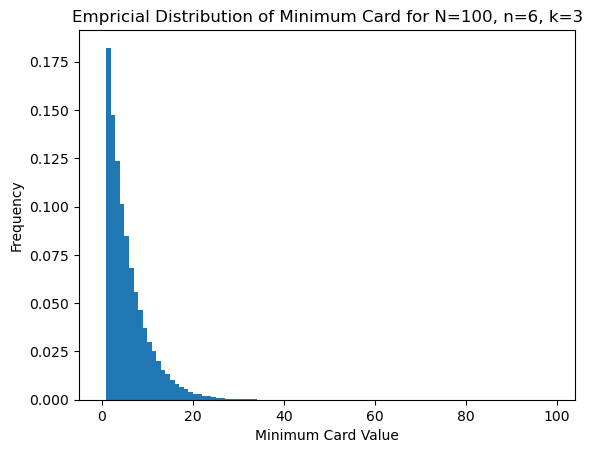

In [8]:
# To Do cell
def get_min(cards: np.ndarray):
    return np.min(cards)

num_sims = 100000
N = 100
n = 6
k = 3
mins = np.zeros(num_sims)
for i in range(num_sims):
    cards = sample_cards(N, n, k)
    mins[i] = get_min(cards)

plt.hist(mins, density=True, bins=np.arange(N));
plt.title(f"Empricial Distribution of Minimum Card for N={N}, n={n}, k={k}");
plt.xlabel("Minimum Card Value");
plt.ylabel("Frequency");

### 2. What is the distribution of the largest gap?

For each simulation, found the largest distance between consecutive numbers in the game. To make this easy, let us first consider the largest gap among the pool of **all** the cards among players (if the largest gap is happening in the hand of one single player, that is ok). This will make the analysis more simple. 

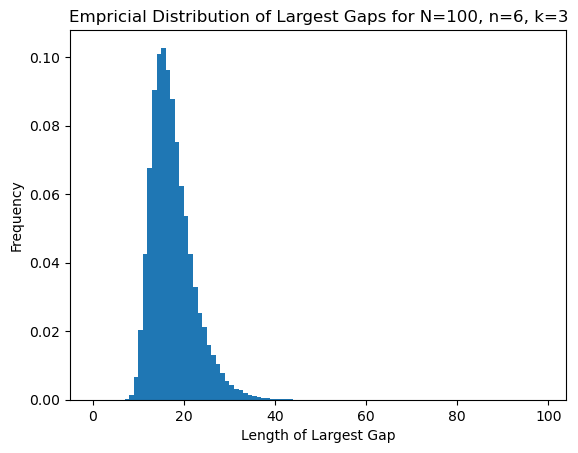

In [9]:
# To Do cell
def get_largest_gap(cards: np.ndarray):
    """
    Calculates the the largest gap between consecutive cards.
    
    Arguments:
     - cards : A 2D Numpy array representing cards assigned to each player.
     
    Returns:
     - `int` repesenting the largest difference between consecutive cards held by players.
    
    """
    
    sorted_cards = np.sort(cards.flatten())
    
    return np.max(np.diff(sorted_cards, n=1))


num_sims = 100000
N = 100
n = 6
k = 3
largest_gaps = np.zeros(num_sims)

for i in range(num_sims):
    cards = sample_cards(N, n, k)
    largest_gaps[i] = get_largest_gap(cards)

plt.hist(largest_gaps, density=True, bins=np.arange(N));
plt.title(f"Empricial Distribution of Largest Gaps for N={N}, n={n}, k={k}");
plt.xlabel("Length of Largest Gap");
plt.ylabel("Frequency");

Repeat the experiment but now compute the largest gap between cards of different players. This is the gap that actually matters for the purposes of the game: what is the maximum number of numbers that a player will have to wait before playing the next card?

In [10]:
num_players = cards.shape[0]
gaps = np.zeros((num_players, cards.shape[1] * (num_players-1)))

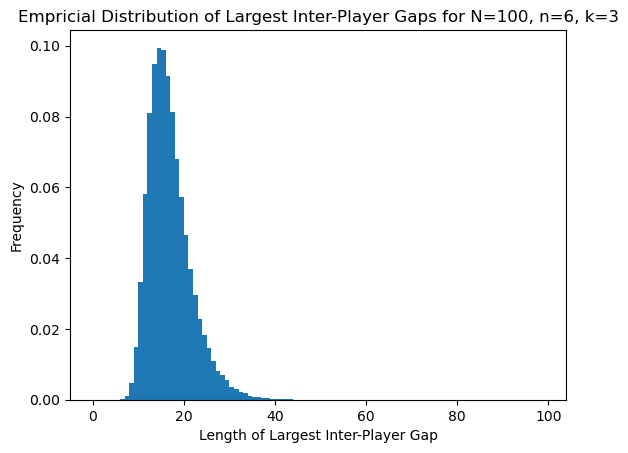

In [11]:
# To Do cell
def get_largest_interplayer_gap(cards: np.ndarray):
    """
    Calculates the the largest gap between consecutive cards held by different players.
    
    Arguments:
     - cards : A 2D Numpy array representing cards assigned to each player.
     
    Returns:
     - `int` repesenting the largest difference between consecutive cards held by different players.
    
    """
    
    num_players = cards.shape[0]
    cards_flat = np.sort(cards.flatten())
    gaps = np.diff(cards_flat)
    max_interplayer_gap = 1
    
    found = False
    
    while not found:
        pos = np.argmax(gaps)
        a = cards_flat[pos]
        b = cards_flat[pos+1]
        
        for player in range(num_players):
            same_player = (a in cards[player]) and (b in cards[player])
            if same_player:
                gaps[pos] = 0 # Set any within same hand to be 0
            else:
                found = True
                
        max_interplayer_gap = np.max(gaps)
                
    return max_interplayer_gap


num_sims = 100000
N = 100
n = 6
k = 3
largest_interplayer_gaps = np.zeros(num_sims)

for i in range(num_sims):
    cards = sample_cards(N, n, k)
    largest_interplayer_gaps[i] = get_largest_interplayer_gap(cards)

plt.hist(largest_interplayer_gaps, density=True, bins=np.arange(N));
plt.title(f"Empricial Distribution of Largest Inter-Player Gaps for N={N}, n={n}, k={k}");
plt.xlabel("Length of Largest Inter-Player Gap");
plt.ylabel("Frequency");

How does these compare? Run simulations for different choices of the number of cards and players and see when the difference between these two is larger. 

Compute the mean of the two distributions. When this difference is larger? How does this depends of the total number of players `n`?

The two are very similar distributions. However, there is a slight difference in that the largest inter-player gap can never be larger than that of all the cards together. We show this below by plotting the difference between the two statistics.

In [12]:
# To Do cell
def sim_and_plot(N, n, k, num_sims=100000):
    largest_interplayer_gaps = np.zeros(num_sims)
    for i in range(num_sims):
        cards = sample_cards(N, n, k)
        largest_gaps[i] = get_largest_gap(cards)
        largest_interplayer_gaps[i] = get_largest_interplayer_gap(cards)
    diffs = largest_gaps - largest_interplayer_gaps

    plt.hist(diffs, density=True, bins=np.arange(max(diffs)+1));
    plt.title(f"Empricial Distribution of Difference of Max Gaps (All - Inter-Player) for N={N}, n={n}, k={k}");
    plt.xlabel("Difference in Maximum Gap Length (All - Inter-Player)");
    plt.ylabel("Frequency");
    plt.show();
    
    print(f"Mean of Largest Gaps: {np.mean(largest_gaps)}")
    print(f"Mean of Largest Inter-Player Gaps: {np.mean(largest_interplayer_gaps)}")
    print(f"Mean of Difference: {np.mean(diffs)}")

    return

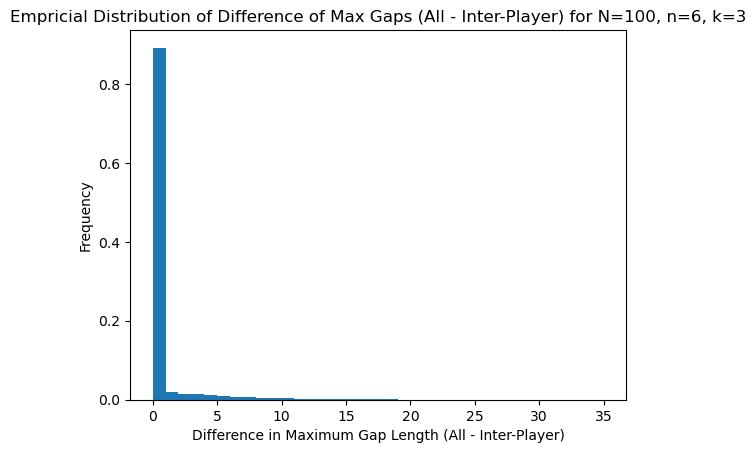

Mean of Largest Gaps: 17.00739
Mean of Largest Inter-Player Gaps: 16.42893
Mean of Difference: 0.57846


In [13]:
sim_and_plot(100, 6, 3)

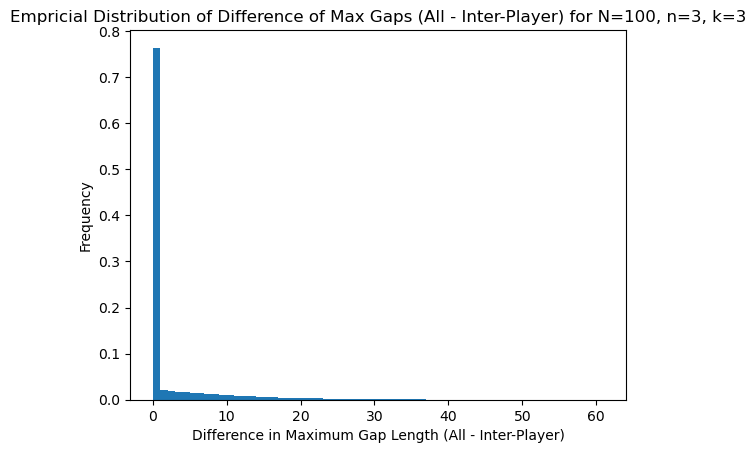

Mean of Largest Gaps: 26.53555
Mean of Largest Inter-Player Gaps: 24.15888
Mean of Difference: 2.37667


In [14]:
sim_and_plot(100, 3, 3)

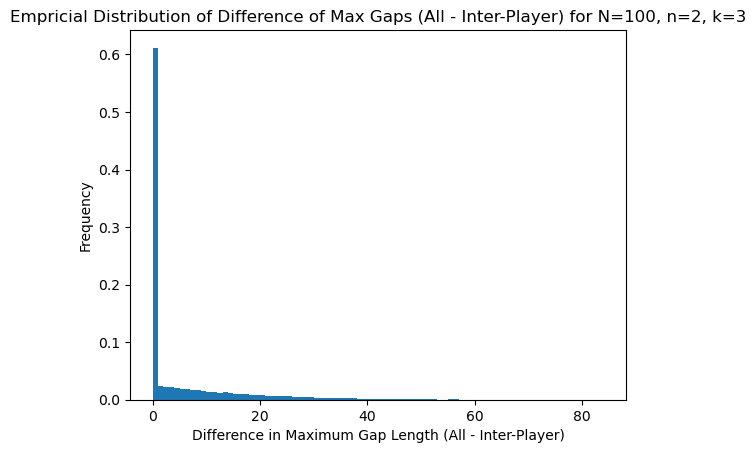

Mean of Largest Gaps: 32.28163
Mean of Largest Inter-Player Gaps: 26.7766
Mean of Difference: 5.50503


In [15]:
sim_and_plot(100, 2, 3)

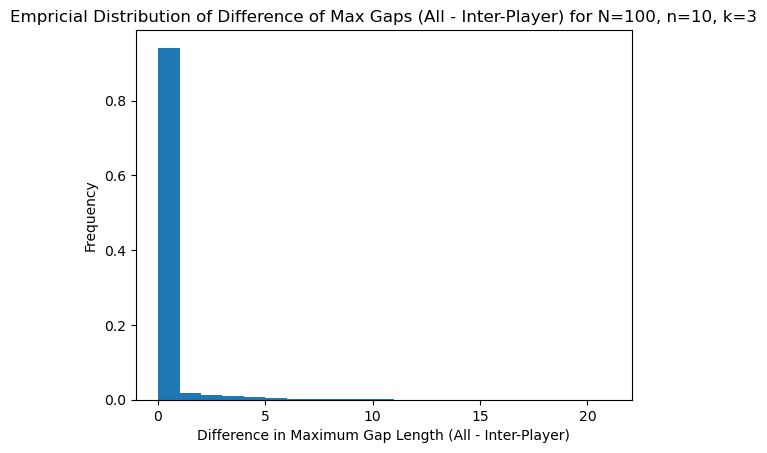

Mean of Largest Gaps: 11.31135
Mean of Largest Inter-Player Gaps: 11.12327
Mean of Difference: 0.18808


In [16]:
sim_and_plot(100, 10, 3)

We observe that this distribution is strictly nonnegative. Also, the difference seems to increase as the number of players dercreases and vice versa.

### 3. Deriving distributions

For this section, we are going to use the random sampling generating process from _The Mind_ to investigate and find some familiar distributions.

### 3.1. Binomial Distribution 

Can you think about any way of deriving the binomial distribution? Based on the output of one single game (function `sample_game()`), try to derive something that has Binomial distribution for certain parameter $p$. Run multiple simulations to see this and compare the obtained empirical distribution with the distribution of the binomial distribution (check `numpy.random.binomial` and `scipy.stats.binom`). 

The number of times the minimum card is less than 31 in 2000 hands of the game is binomial as it is the sum of iid indicators. Letting X be this quantity, we have the $X \sim \mathrm{Bin}(n=20, p=30/100)$

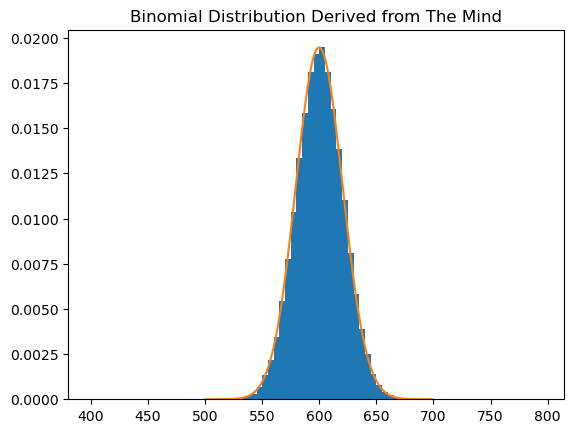

In [17]:
# To Do cell
X = np.random.binomial(n=2000, p=30/100, size=100000)
x = np.arange(500, 700, 1)
plt.hist(X, range=(500, 700), bins=np.arange(400, 800, 5), density=True);
plt.plot(x, binom(n=2000, p=30/100).pmf(x));
plt.title("Binomial Distribution Derived from The Mind");

### 3.2. Beta Distribution

The [order statistics](https://en.wikipedia.org/wiki/Order_statistic) of the uniform distribution are such that follow a Beta distribution. If well here we are not exactly sampling real numbers in $[0,1]$ following the uniform distribution, you can imagine that sampling one single number without repetition from $\{ 1, 2, 3, \ldots, N \}$ is not very different...

Compare the distribution of the lowest number in the sample (Part 1) with a [Beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) with adequate choices of parameters. In order to do this, notice that the $k$th order statistics of a sample of $n$ uniformly distributed points in $[0,1]$ is $\text{Beta}(k, n+1-k)$ (These $n$ and $k$ are not the same as before, you need to pick the right values of these).

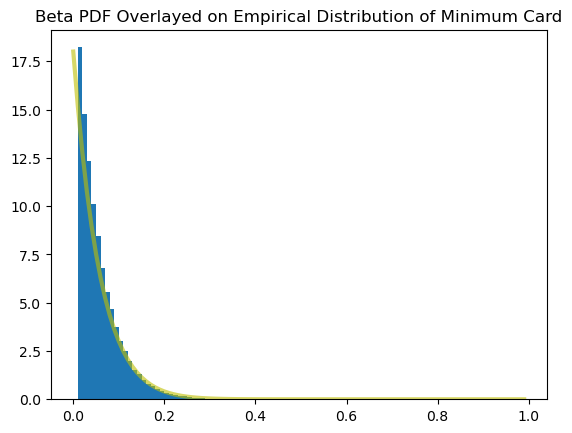

In [18]:
# To Do cell
N = 100
n = 6
k = 3
a = 1
b = n*k

x = np.arange(0, 1, 1/N)
plt.plot(x, beta.pdf(x, a, b), 'y-', lw=3, alpha=0.6, label='beta pdf');
plt.title("Beta PDF Overlayed on Empirical Distribution of Minimum Card");
plt.hist(mins/N, density=True, bins=x);
plt.show()

The two match closely!

### 3.3. Exponential Distribution

If we call $U_1$ the minimum number in the sample (Part 1), then make an histogram with the distribution of the transformed random variable given by 
$$
X = - \ln \left( 1 - \frac{U_1}{N} \right)
$$
and compare this with the distribution of an exponential random variable with parameter $nk$, the total number of cards in the game. 

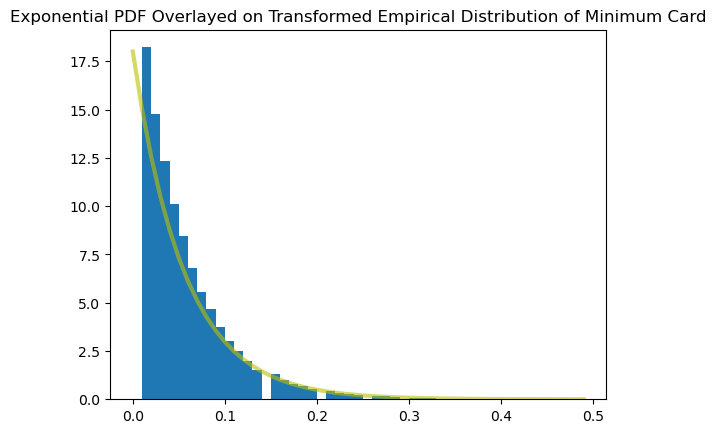

In [57]:
x = np.arange(0, 0.5, 0.01)
X = -np.log(1-mins/N)
plt.plot(x, expon(loc=0, scale=1/(n*k)).pdf(x), 'y-', lw=3, alpha=0.6, label='exp pdf');
plt.title("Exponential PDF Overlayed on Transformed Empirical Distribution of Minimum Card");
plt.hist(X, density=True, bins=x);
plt.show()


### 4. What happens when $n * k << N$?

Some of the distribution we saw in previous sections are just approximate. Study what happens when we increase the number of cards. Try to understand how the cases of sampling with and without reposition compare as $n * k << N$. What do you expect to see in these cases? When the difference between the two sampling strategies will lead to similar or different results. 

In [65]:
# To Do cell
num_sims = 100000
N = 10000
n = 6
k = 3
a = 1
b = n*k
from tqdm import trange
new_mins = np.zeros(num_sims)
for i in trange(num_sims):
    cards = sample_cards(N, n, k)
    new_mins[i] = get_min(cards)

100%|██████████| 100000/100000 [00:14<00:00, 6856.13it/s]


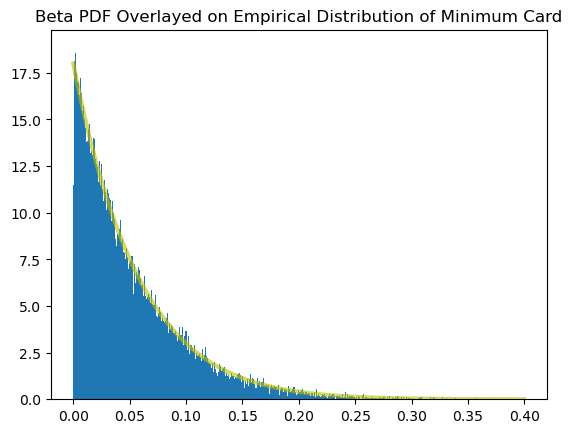

In [67]:
x = np.arange(0, 0.4, 3/N)
plt.plot(x, beta.pdf(x, a, b), 'y-', lw=3, alpha=0.6, label='beta pdf');
plt.title("Beta PDF Overlayed on Empirical Distribution of Minimum Card");
plt.hist(new_mins/N, density=True, bins=x);
plt.show()

The Beta distribution is related to order statistics on the continuous Uniform([0, 1]), but we are approximating it with a discrete uniform([0, 1, ..., N-1, N])/N. Thus, our approximation will be better when N is larger, as it makes our increments on the interval [0, 1] smaller.

### Contribution statement

Please include a list of the students you work with along this project (including yourself). Include both names and GitHub usernames of the people you collaborated with. Maximum of three persons per group. 
- Member No1: Matthew Dworkin (MatthewDworkin)
- Member No2: Maya Madhavan (Maya-Madhavan)
- Member No3: